# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [2]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


In [3]:
stocks_df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close     Volume  \
0    2006-05-25    3.748967    4.283869    3.739664    4.279217  395343000   
1    2006-05-26    4.307126    4.348058    4.103398    4.179680  103044000   
2    2006-05-30    4.183400    4.184330    3.986184    4.093164   49898000   
3    2006-05-31    4.125723    4.219679    4.125723    4.180608   30002000   
4    2006-06-01    4.179678    4.474572    4.176887    4.419686   62344000   
...         ...         ...         ...         ...         ...        ...   
3867 2021-10-05  347.121403  348.130138  342.497241  342.776886    4724100   
3868 2021-10-06  339.580960  348.439763  338.682072  348.250000    3712000   
3869 2021-10-07  349.000000  357.899994  349.000000  353.910004    3209200   
3870 2021-10-08  356.000000  360.369995  354.209991  354.959991    2336700   
3871 2021-10-11  353.950012  354.880005  346.899994  347.149994    2766800   

      Dividends  Stock Splits  

In [4]:
stocks_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583,2013.583936,735265.486054
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706,4.454620,1622.149194
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000,2006.000000,732456.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000,2010.000000,733861.750000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000,2014.000000,735267.500000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000,2017.000000,736668.250000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000,2021.000000,738074.000000


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

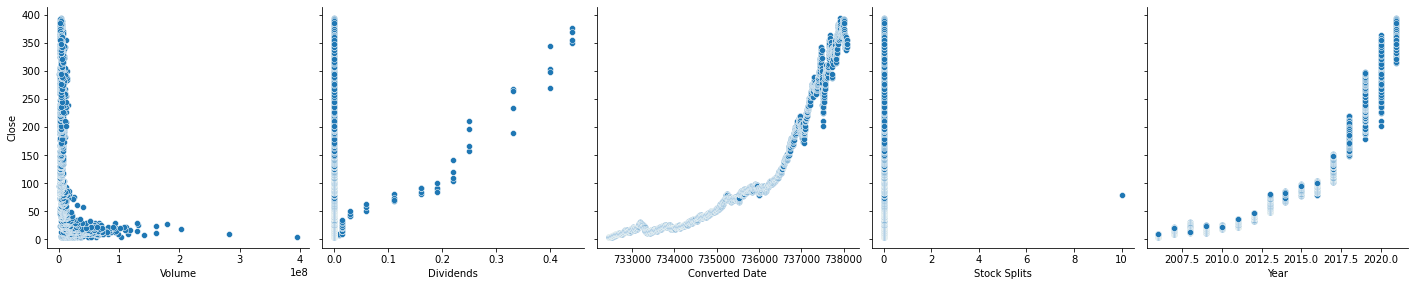

In [9]:
sb.pairplot(stocks_df, x_vars=['Volume', 'Dividends', 'Converted Date', 'Stock Splits', 'Year'],
            y_vars='Close', height=4, aspect=1, kind='scatter')
plt.show()

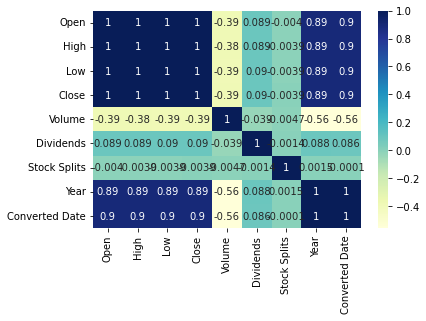

In [8]:
sb.heatmap(stocks_df.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [10]:
X = stocks_df['Converted Date']
y = stocks_df['Close']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [12]:
X_train

2457    736024
1540    734690
384     733014
2560    736172
3320    737276
         ...  
1930    735260
79      732572
1859    735155
2840    736578
1544    734696
Name: Converted Date, Length: 2710, dtype: int64

In [13]:
y_train

2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
           ...    
1930     72.464973
79        6.057884
1859     65.574173
2840    129.896942
1544     40.199707
Name: Close, Length: 2710, dtype: float64

In [15]:
X_test

2424    735975
2643    736290
2501    736087
2044    735424
288     732876
         ...  
2219    735677
2875    736627
531     733230
2844    736584
2689    736360
Name: Converted Date, Length: 1162, dtype: int64

In [16]:
y_test

2424     88.322464
2643    102.939384
2501     93.349648
2044     72.125427
288      15.644708
           ...    
2219     86.132256
2875    143.167923
531      23.050558
2844    139.212296
2689    103.542221
Name: Close, Length: 1162, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [17]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [19]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const            -43439.684218
Converted Date        0.059224
dtype: float64

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:29:51   Log-Likelihood:                -14290.
No. Observations:                2710   AIC:                         2.858e+04
Df Residuals:                    2708   BIC:                         2.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.344e+04    408.731   -106.279      0.000   -4.42e+04   -4.26e+04
Converted Date     0.0592      0.001    106.541      0.000       0.058       0.060
==============================================================================
Omnibus:                      299.210   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.027
Skew:                           0.520   Prob(JB):                     1.48e-41
Kurtosis:                       2.237   Cond. No.                     3.31e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

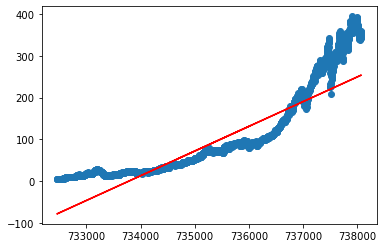

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -43440 + 0.0592*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [22]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

C:\Users\dance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


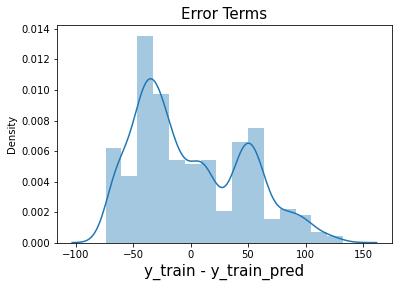

In [23]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

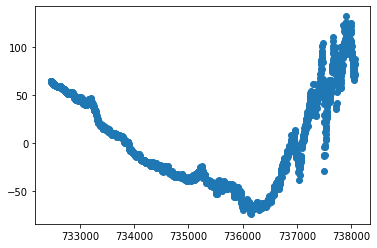

In [24]:
plt.scatter(X_train, res)
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold? yes
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares?  No, because the residuals are not following the normal distribution graph and they seem to be following some kind of pattern.